In [123]:
import pandas as pd

In [124]:
from IPython.display import display, HTML

def display_scrollable(df, rows=10):
    display(HTML(df.to_html(notebook=True, max_rows=rows, max_cols=None, border=0)))

In [125]:
pipe_df = pd.read_csv("./data/Fearless_709H-10_31-11_07.csv")

In [126]:
pipe_df.head()

,Time,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open
0,10/31/2024 12:00:00 am,559.02255,543.0,44.65046
1,10/31/2024 12:14:00 am,549.63090,NaN,44.68318
2,10/31/2024 12:30:00 am,586.35675,NaN,44.58979
3,10/31/2024 12:46:00 am,573.30135,NaN,44.62712
4,10/31/2024 1:00:00 am,564.64830,543.0,44.64499


In [127]:
for i in range(1, len(pipe_df)):
    if pd.isna(pipe_df.loc[i, "Inj Gas Meter Volume Instantaneous"]):
        pipe_df.loc[i, "Inj Gas Meter Volume Instantaneous"] = pipe_df.loc[i - 1, "Inj Gas Meter Volume Instantaneous"]
    if pd.isna(pipe_df.loc[i, "Inj Gas Meter Volume Setpoint"]):
        pipe_df.loc[i, "Inj Gas Meter Volume Setpoint"] = pipe_df.loc[i - 1, "Inj Gas Meter Volume Setpoint"]
    if pd.isna(pipe_df.loc[i, "Inj Gas Valve Percent Open"]):
        pipe_df.loc[i, "Inj Gas Valve Percent Open"] = pipe_df.loc[i - 1, "Inj Gas Valve Percent Open"]

In [93]:
pipe_df.describe()

,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open
count,711.000000,711.0,711.000000
mean,536.570598,543.0,46.398195
std,37.296219,0.0,3.684371
min,0.000000,543.0,44.315610
25%,521.104575,543.0,44.962990
50%,536.618250,543.0,45.308160
75%,555.420450,543.0,46.373265
max,611.361150,543.0,100.000000


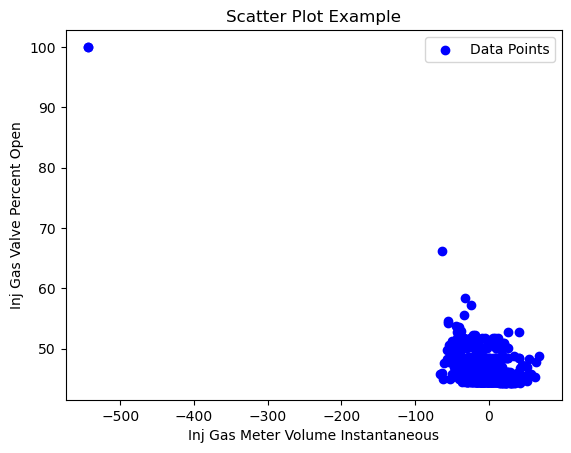

In [128]:
import matplotlib.pyplot as plt

pipe_df["diff"] = pipe_df["Inj Gas Meter Volume Instantaneous"] - 543

# Create a scatter plot
plt.scatter(
    "diff", 
    "Inj Gas Valve Percent Open", 
    color ='blue', 
    label='Data Points',
    data = pipe_df
)

# Add labels and title
plt.xlabel('Inj Gas Meter Volume Instantaneous')
plt.ylabel('Inj Gas Valve Percent Open')
plt.title('Scatter Plot Example')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [129]:
pipe_df.describe()

,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open,diff
count,711.000000,711.0,711.000000,711.000000
mean,536.570598,543.0,46.398195,-6.429402
std,37.296219,0.0,3.684371,37.296219
min,0.000000,543.0,44.315610,-543.000000
25%,521.104575,543.0,44.962990,-21.895425
50%,536.618250,543.0,45.308160,-6.381750
75%,555.420450,543.0,46.373265,12.420450
max,611.361150,543.0,100.000000,68.361150


In [130]:
avg = pipe_df["Inj Gas Meter Volume Instantaneous"].mean()
stdev = pipe_df["Inj Gas Meter Volume Instantaneous"].std()
level = 2
lower = avg - level*stdev
upper = avg + level*stdev

In [131]:
pipe_df.describe()

,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open,diff
count,711.000000,711.0,711.000000,711.000000
mean,536.570598,543.0,46.398195,-6.429402
std,37.296219,0.0,3.684371,37.296219
min,0.000000,543.0,44.315610,-543.000000
25%,521.104575,543.0,44.962990,-21.895425
50%,536.618250,543.0,45.308160,-6.381750
75%,555.420450,543.0,46.373265,12.420450
max,611.361150,543.0,100.000000,68.361150


In [109]:
pipe_df[(pipe_df["Inj Gas Meter Volume Instantaneous"] > upper) | (pipe_df["Inj Gas Meter Volume Instantaneous"] < lower)]

,Time,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open
1853,09/27/2024 7:32:00 pm,674.691975,937.5,100.00000
1854,09/27/2024 7:34:00 pm,599.349300,937.5,100.00000
1855,09/27/2024 7:36:00 pm,550.697925,937.5,100.00000
1856,09/27/2024 7:40:00 pm,517.408050,937.5,100.00000
1857,09/27/2024 7:42:00 pm,482.556350,937.5,100.00000
...,...,...,...,...
1922,09/27/2024 10:06:00 pm,195.537750,937.5,100.00000
1923,09/27/2024 10:08:00 pm,143.639175,937.5,100.00000
1924,09/27/2024 10:10:00 pm,0.000000,937.5,100.00000
1925,09/27/2024 10:58:00 pm,485.576550,937.5,100.00000
